## EDA on a Dataset with Missing Data

//Objective: Perform a more realistic EDA that involves identifying and handling
missing values.//

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


///load data://

In [26]:
df=sns.load_dataset("titanic")

///Initial values//

In [21]:
head=df.head()
print("Head values :\n",head)
tail=df.tail()
print("Tail values:\n",tail)
info=df.info()
print("info:\n",info)

Head values :
    survived  pclass     sex   age  ...  deck  embark_town  alive  alone
0         0       3    male  22.0  ...   NaN  Southampton     no  False
1         1       1  female  38.0  ...     C    Cherbourg    yes  False
2         1       3  female  26.0  ...   NaN  Southampton    yes   True
3         1       1  female  35.0  ...     C  Southampton    yes  False
4         0       3    male  35.0  ...   NaN  Southampton     no   True

[5 rows x 15 columns]
Tail values:
      survived  pclass     sex   age  ...  deck  embark_town  alive  alone
886         0       2    male  27.0  ...   NaN  Southampton     no   True
887         1       1  female  19.0  ...     B  Southampton    yes   True
888         0       3  female   NaN  ...   NaN  Southampton     no  False
889         1       1    male  26.0  ...     C    Cherbourg    yes   True
890         0       3    male  32.0  ...   NaN   Queenstown     no   True

[5 rows x 15 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

///Identify Missing Values://

In [22]:
missing_values=df.isnull().sum()
print("Count the missing values:\n",missing_values)

Count the missing values:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


//Visualize//

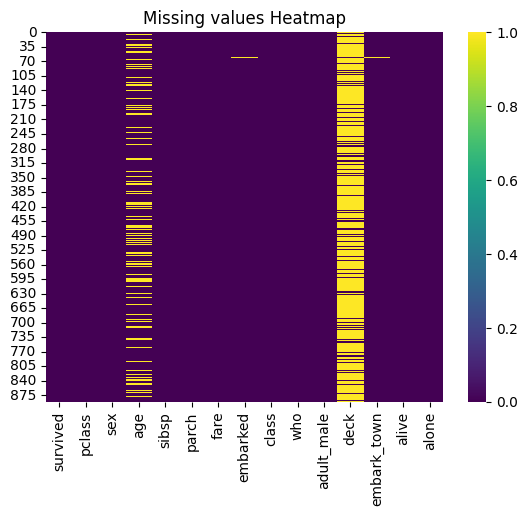

In [23]:
plt.Figure(figsize=(10,6))
sns.heatmap(data=df.isnull(),cbar=True,cmap="viridis")
plt.title('Missing values Heatmap')
plt.show()

///Analyze and impute/Drop

In [ ]:
df['age']=df['age'].fillna(df['age'].median())  ## fill the missing value with median age
df=df.drop(columns=["deck"]) ##drop this missing column entirely
df['embarked']=df['embarked'].fillna(df['embarked'].mode())  ##fill missing value with mode(most common value)



///Create new feature//

In [29]:
df["family_size"]=df["sibsp"]+df["parch"]
df["is_alone"]=df["family_size"].apply(lambda x:1 if x==0 else 0)
print("After cleaning")
print(df.head())

After cleaning
   survived  pclass     sex   age  ...  alive  alone  family_size is_alone
0         0       3    male  22.0  ...     no  False            1        0
1         1       1  female  38.0  ...    yes  False            1        0
2         1       3  female  26.0  ...    yes   True            0        1
3         1       1  female  35.0  ...    yes  False            1        0
4         0       3    male  35.0  ...     no   True            0        1

[5 rows x 16 columns]


//visualize count of is_alone vs survived

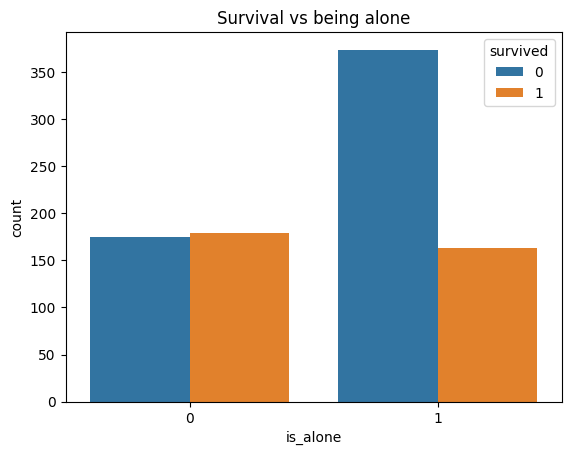

In [30]:
sns.countplot(data=df,x="is_alone",hue="survived")
plt.title("Survival vs being alone")
plt.show()